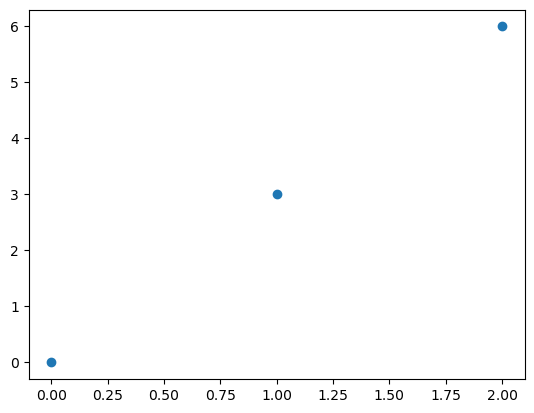

0
1
2
3
4
5
6
7
8
9


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# x = range(10)
# y = x * 3
x_np = np.arange(10)
y_np = x_np * 3
y_np = y_np[:3]

fig, ax = plt.subplots()
ax.scatter(x=np.arange(3), y=y_np)

plt.show()

for i in np.arange(10):
    print(i)



In [19]:
weight = np.random.random(size=(20))
conn = np.random.choice(a=[0, 1], size=20)

subset = weight[conn]
print(len(subset))

print(weight.sum())
print(weight[conn].sum())
print(len(subset.flatten()))
print(weight.mean())
print(weight[conn].mean())
print(np.mean(weight))
print(np.mean(weight[conn]))

20
9.745339699599365
5.729273723806959
20
0.48726698497996823
0.28646368619034795
0.48726698497996823
0.28646368619034795


0.5


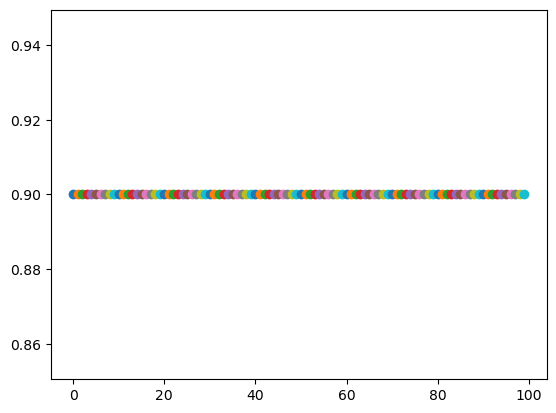

In [72]:
## Testing numerical stability

def random_conn(n:int=10, mean_w:float=0.5, proba_conn:float=0.07):
    # conn_matrix = np.random.binomial(n=1, p=proba_conn, size=(n))
    conn_matrix = np.random.choice([True, False], p=[proba_conn, 1-proba_conn], size=n)
    w_matrix = np.random.random(size=(n))

    connected_subset = w_matrix[conn_matrix]
    connected_nn_mean = np.mean(connected_subset)
    norm_scale = mean_w / connected_nn_mean
    w_matrix = np.multiply(norm_scale, w_matrix)

    # Mark non-connected as zero
    w_matrix = np.multiply(conn_matrix, w_matrix)

    return np.mean(w_matrix[conn_matrix])


print(random_conn())


fig, ax = plt.subplots()
for i in range(100):
    ax.scatter(x=i, y=random_conn(n=1000, mean_w=0.9))



In [69]:
5.5 * False

0.0

In [87]:
import numpy as np
print(np.array([1, 2, 3, 4]).dtype is np.dtype("int64"))

print(np.array([True, False]).dtype)

True
bool


In [8]:
import numpy as np
random_matrix = np.random.random(size=(5, 5)) * 10
np.clip(random_matrix, a_min=0, a_max=1, out=random_matrix)

random_matrix

array([[1.        , 1.        , 0.15783397, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.81013283, 1.        ],
       [1.        , 1.        , 1.        , 0.45637487, 0.79501411]])

In [8]:
import numpy as np

mat = np.random.random(size=(5, 5))
mat2 = np.empty(shape=(5, 5))

print(mat2)

[[0.20278696 0.53245958 0.94904217 0.65598735 0.89331142]
 [0.6079407  0.55330981 0.21254345 0.3043248  0.48258853]
 [0.21628393 0.58166599 0.13807727 0.66916059 0.39269949]
 [0.37408618 0.77382106 0.70617622 0.87073982 0.0234385 ]
 [0.74719854 0.52918236 0.95663305 0.25411667 0.53147165]]


In [22]:
## This is a big problem, in Jesse and I's ipynb line 332, the spike flag mask is creating a list of number, which np interpretes as index instead of bool.

import numpy as np

v = np.random.random((5,))
v_th = np.random.random((5, ))
print(v > v_th)

spike_flag = np.random.choice([0, 1], size=(5, ), p=[0.5, 0.5])
print(spike_flag)

sp = (v > v_th) * (spike_flag)
sp = sp.astype(bool)
print(sp)

an_array = np.array(np.arange(5))
print(f"an_array: {an_array}")

print(an_array[sp])


[ True  True False False False]
[1 1 0 1 1]
[ True  True False False False]
an_array: [0 1 2 3 4]
[0 1]


In [9]:
import numpy as np

rv = np.random.random(size=5)
clipped = np.clip(rv[3], a_min=0.2, a_max=0.4)

print(f"rv: {rv}")
print(f"clipped: {clipped}")

rv: [0.6218225  0.30501898 0.30013877 0.13793903 0.72370737]
clipped: 0.2


In [41]:
import numpy as np

class testClass():
    def method1(self, kappa=8):
        print(f"method1: {kappa}")
        return kappa
    def method2(self, kappa=400):
        print(f"method2: {kappa}")

    def append_to(self, element, to=[]):
        to2 = to.copy()
        to2.append(element)
        to.append(element)
        print(f"Share memory?: {np.shares_memory(to2, to)}")
        return to
    
    def add_to(self, num, alpha=5):
        alpha2 = alpha
        alpha+=num
        print(f"Share memory?: {np.shares_memory(alpha2, alpha)}")
        return alpha
    

test = testClass()

In [42]:
test.append_to(5)
test.append_to(10)

Share memory?: False
Share memory?: False


[5, 10]

In [17]:
def append_to(element, to=[]):
    to.append(element)
    return to

In [18]:
my_list = append_to(12)
print(my_list)

my_other_list = append_to(42)
print(my_other_list)

[12]
[12, 42]
